In [1]:
# Install libraries if needed (uncomment)
# !pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
os.makedirs("../output/plots", exist_ok=True)
os.makedirs("../output/tables", exist_ok=True)
print("Output folders created!")


Output folders created!


In [3]:
df = pd.read_csv("../data/cleaned_batting_card.csv")

print("Dataset Loaded:", df.shape)
df.head()


Dataset Loaded: (15720, 24)


,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,...,minutes,fours,sixes,strikerate,captain,isnotout,runningscore,runningover,shorttext,commentary
0,2023,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,0,0.0,0.0,16.66,False,False,0,2.2,b Mohammed Shami,<strong>Shami breaches the defences of Conway<...
1,2023,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,0,4.0,9.0,184.00,False,False,0,17.1,c Shubman Gill b Joseph,"Joseph misses the yorker, but is still a hard-..."
2,2023,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,0,4.0,1.0,135.29,False,False,0,5.5,c &dagger;Saha b Rashid Khan,"<strong>Rashid strikes back, Moeen has nicked ..."
3,2023,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,0,1.0,0.0,116.66,False,False,0,7.4,c &dagger;Saha b Rashid Khan,<strong>Rashid takes out both Moeen and Stokes...
4,2023,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,0,0.0,1.0,100.00,False,False,0,12.5,b Little,Maiden IPL wicket for Josh Little. Rayudu dash...


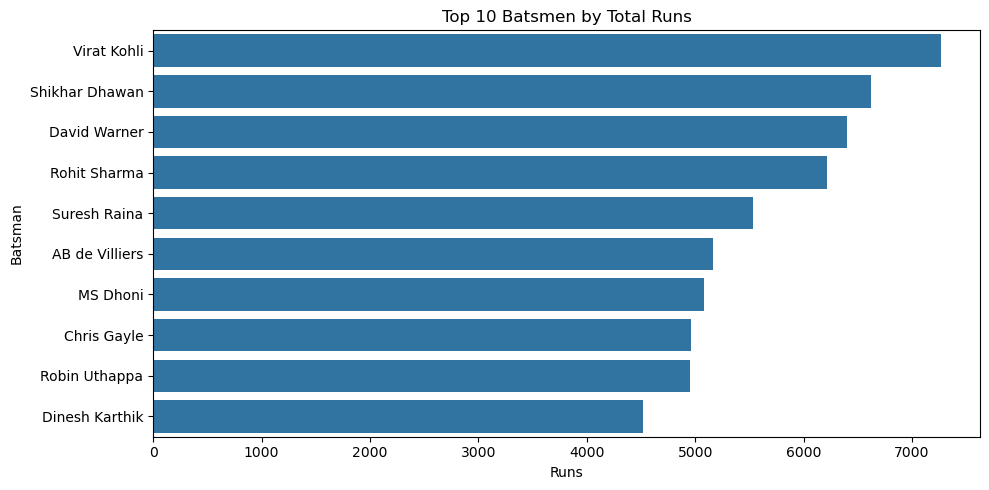

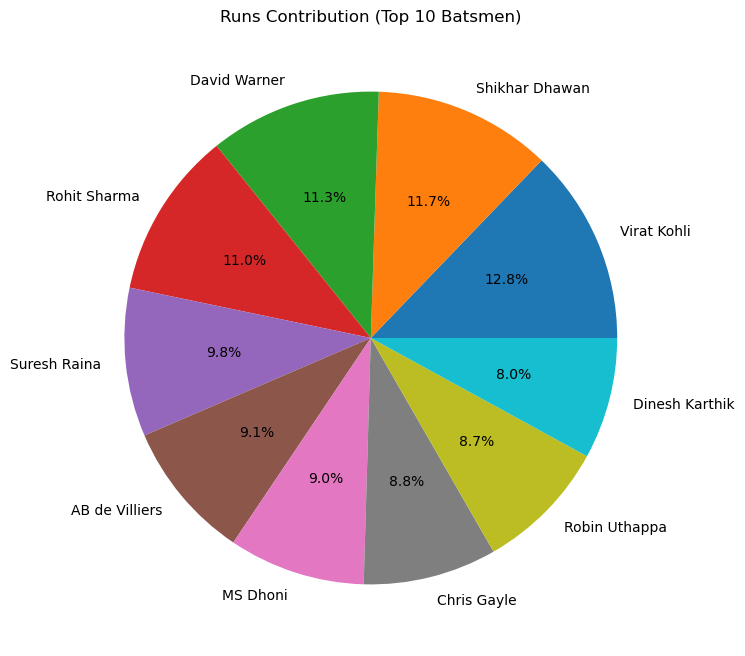

In [4]:
top_batsmen = (
    df.groupby("fullname")["runs"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_batsmen.to_csv("../output/tables/top10_batsmen_runs.csv")

plt.figure(figsize=(10,5))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index)
plt.title("Top 10 Batsmen by Total Runs")
plt.xlabel("Runs")
plt.ylabel("Batsman")
plt.tight_layout()
plt.savefig("../output/plots/top10_batsmen_runs.png")
plt.show()

# Pie
plt.figure(figsize=(8,8))
plt.pie(top_batsmen.values, labels=top_batsmen.index, autopct="%1.1f%%")
plt.title("Runs Contribution (Top 10 Batsmen)")
plt.savefig("../output/plots/top10_batsmen_runs_pie.png")
plt.show()


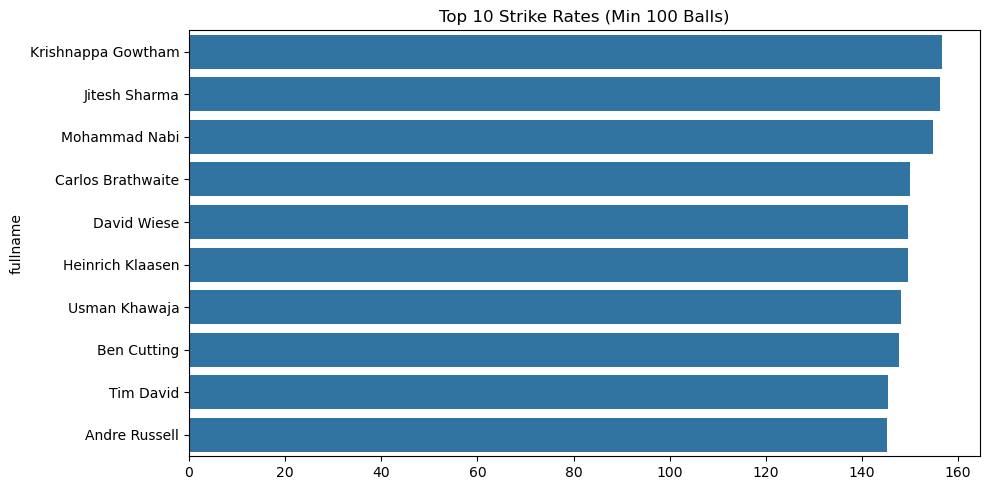

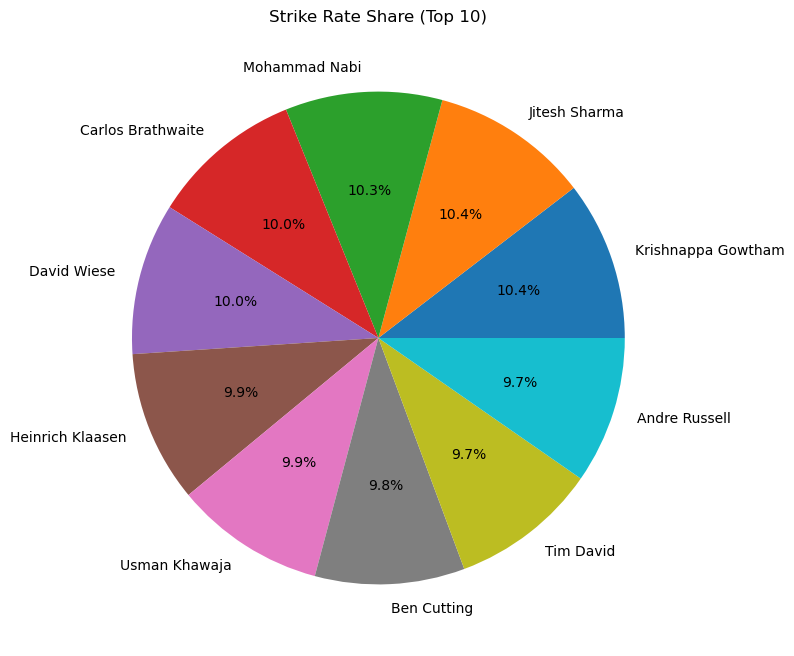

In [5]:
df["ballsfaced"] = pd.to_numeric(df["ballsfaced"], errors="coerce")
df["strikerate"] = pd.to_numeric(df["strikerate"], errors="coerce")

df_clean = df.dropna(subset=["ballsfaced", "strikerate"])

grouped = df_clean.groupby("fullname").agg({
    "ballsfaced": "sum",
    "strikerate": "mean"
})

qualified = grouped[grouped["ballsfaced"] >= 100]

if qualified.empty:
    print("⚠ No player has 100+ balls after grouping!")
else:
    top_sr = qualified["strikerate"].sort_values(ascending=False).head(10)

    top_sr.to_csv("../output/tables/top_strike_rate.csv")

    plt.figure(figsize=(10,5))
    sns.barplot(x=top_sr.values, y=top_sr.index)
    plt.title("Top 10 Strike Rates (Min 100 Balls)")
    plt.tight_layout()
    plt.savefig("../output/plots/top_strike_rate.png")
    plt.show()

    # Pie
    plt.figure(figsize=(8,8))
    plt.pie(top_sr.values, labels=top_sr.index, autopct="%1.1f%%")
    plt.title("Strike Rate Share (Top 10)")
    plt.savefig("../output/plots/top_strike_rate_pie.png")
    plt.show()


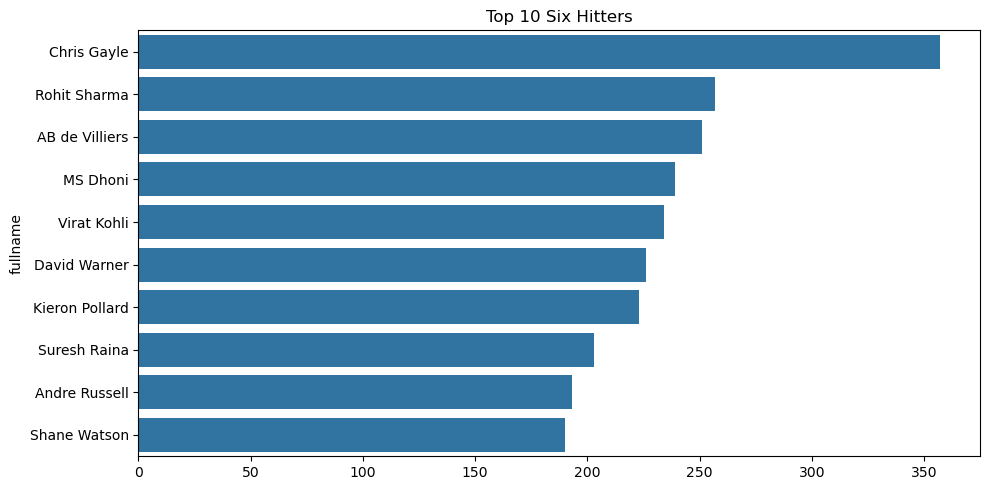

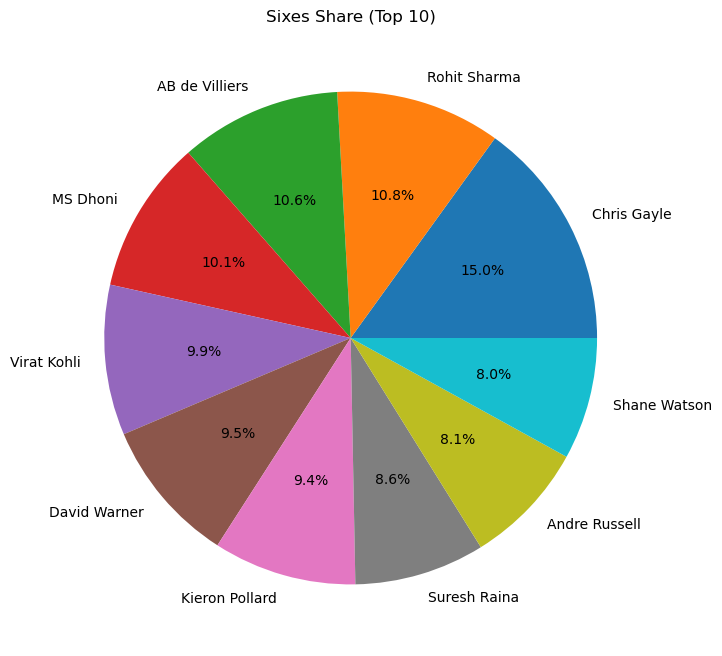

In [6]:
top_fours = df.groupby("fullname")["fours"].sum().sort_values(ascending=False).head(10)
top_sixes = df.groupby("fullname")["sixes"].sum().sort_values(ascending=False).head(10)

top_fours.to_csv("../output/tables/top_fours.csv")
top_sixes.to_csv("../output/tables/top_sixes.csv")

plt.figure(figsize=(10,5))
sns.barplot(x=top_sixes.values, y=top_sixes.index)
plt.title("Top 10 Six Hitters")
plt.tight_layout()
plt.savefig("../output/plots/top10_sixes.png")
plt.show()

plt.figure(figsize=(8,8))
plt.pie(top_sixes.values, labels=top_sixes.index, autopct="%1.1f%%")
plt.title("Sixes Share (Top 10)")
plt.savefig("../output/plots/top10_sixes_pie.png")
plt.show()


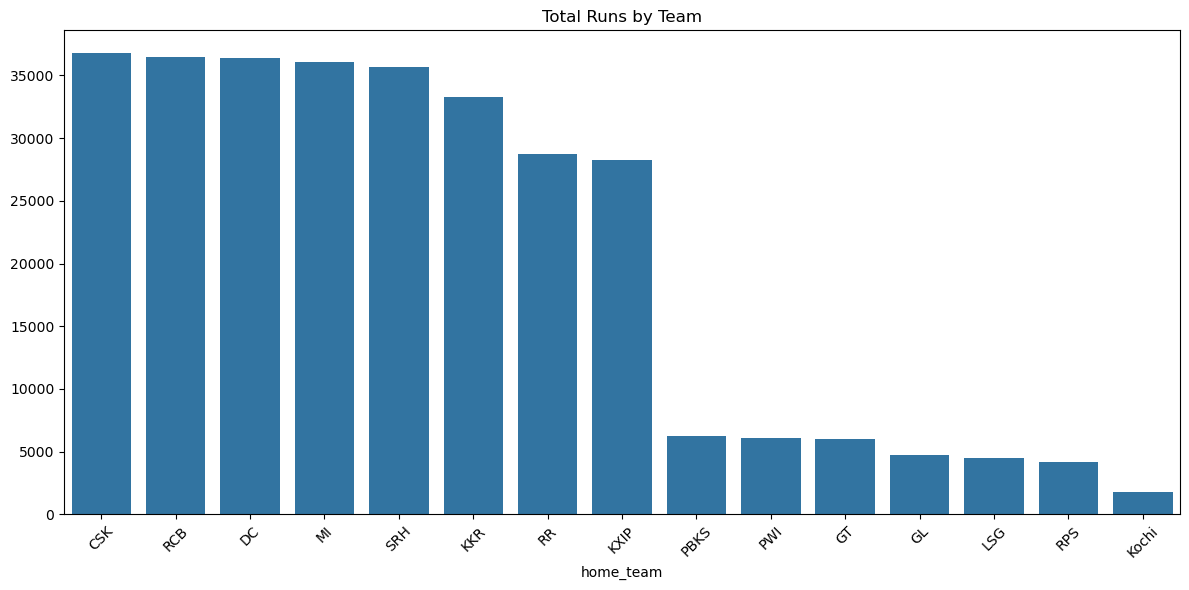

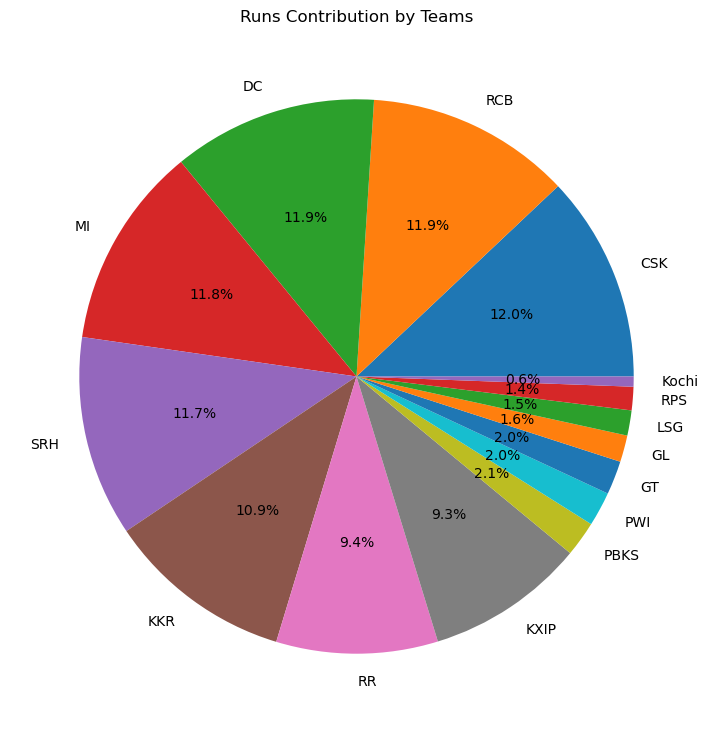

In [7]:
team_runs = (
    df.groupby("home_team")["runs"]
    .sum()
    .sort_values(ascending=False)
)

team_runs.to_csv("../output/tables/team_runs.csv")

plt.figure(figsize=(12,6))
sns.barplot(x=team_runs.index, y=team_runs.values)
plt.xticks(rotation=45)
plt.title("Total Runs by Team")
plt.tight_layout()
plt.savefig("../output/plots/team_runs.png")
plt.show()

plt.figure(figsize=(9,9))
plt.pie(team_runs.values, labels=team_runs.index, autopct="%1.1f%%")
plt.title("Runs Contribution by Teams")
plt.savefig("../output/plots/team_runs_pie.png")
plt.show()


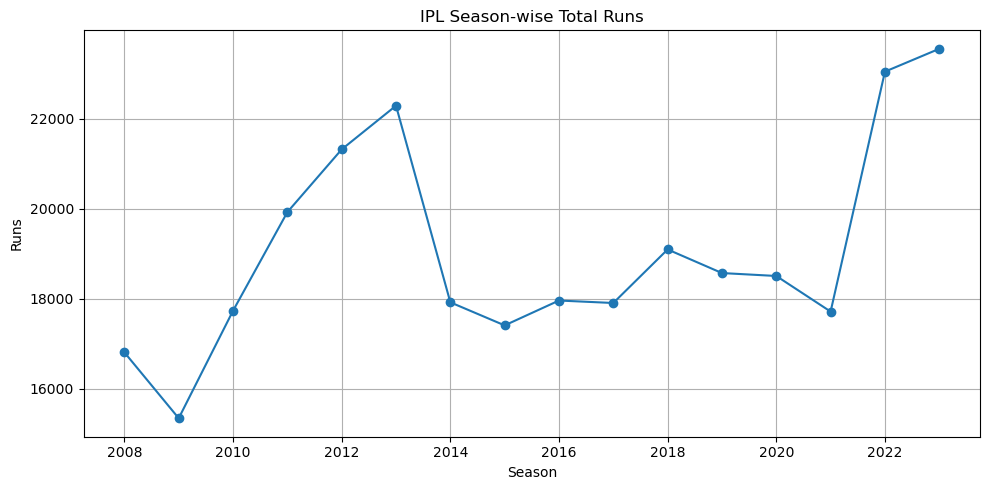

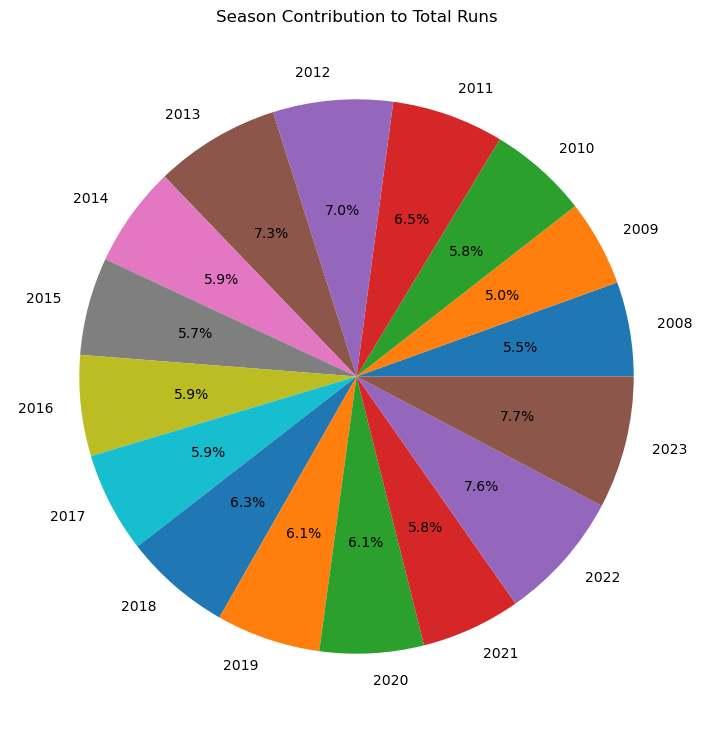

In [8]:
season_trend = df.groupby("season")["runs"].sum()

season_trend.to_csv("../output/tables/season_trend.csv")

plt.figure(figsize=(10,5))
plt.plot(season_trend.index, season_trend.values, marker="o")
plt.title("IPL Season-wise Total Runs")
plt.xlabel("Season")
plt.ylabel("Runs")
plt.grid(True)
plt.tight_layout()
plt.savefig("../output/plots/season_trend.png")
plt.show()

plt.figure(figsize=(9,9))
plt.pie(season_trend.values, labels=season_trend.index, autopct="%1.1f%%")
plt.title("Season Contribution to Total Runs")
plt.savefig("../output/plots/season_trend_pie.png")
plt.show()


In [9]:
print("\n✔ ALL GRAPHS SAVED IN: ../output/plots")
print("✔ ALL TABLES SAVED IN: ../output/tables")
print("🎉 Notebook Execution Completed!")



✔ ALL GRAPHS SAVED IN: ../output/plots
✔ ALL TABLES SAVED IN: ../output/tables
🎉 Notebook Execution Completed!
